Importing necessary packages

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import random
import numpy as np

Loading training and testing data

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train=X_train/255
X_test=X_test/255

Defining network architecture

In [10]:
model=Sequential([Flatten(input_shape=(28,28)),
                  Dense(128,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(metrics=['accuracy'],
             loss=['sparse_categorical_crossentropy'],
             optimizer="sgd")

Training the model

In [13]:
h=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7264 - loss: 1.0304 - val_accuracy: 0.9138 - val_loss: 0.3096
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9135 - loss: 0.3065 - val_accuracy: 0.9296 - val_loss: 0.2491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.2487 - val_accuracy: 0.9376 - val_loss: 0.2142
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9402 - loss: 0.2086 - val_accuracy: 0.9440 - val_loss: 0.1899
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9488 - loss: 0.1833 - val_accuracy: 0.9504 - val_loss: 0.1701
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9519 - loss: 0.1678 - val_accuracy: 0.9545 - val_loss: 0.1542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9578 - loss: 0.1484 - val_accuracy: 0.9576 - val_loss: 0.1437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9617 - loss: 0.1321 - 

Evaluating the network

In [15]:
loss,accur=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9553 - loss: 0.1520


Plotting training accuracy and loss

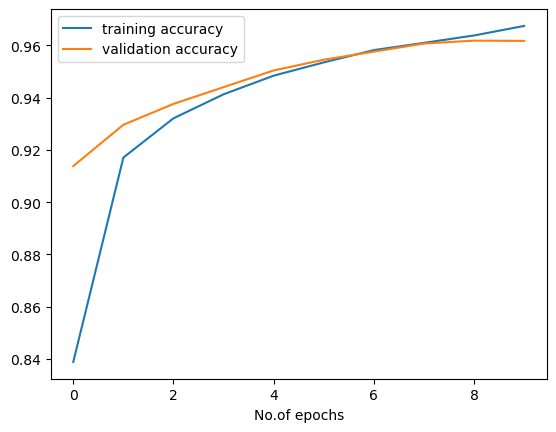

In [60]:
plt.plot(h.history['accuracy'],label='training accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.xlabel("No.of epochs")
plt.legend()
plt.show()

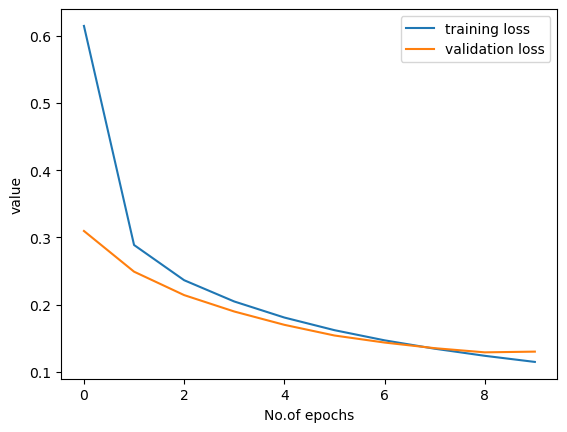

In [64]:
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.xlabel("No.of epochs")
plt.ylabel("value")
plt.legend()
plt.show()

In [132]:
random_index=random.randint(0,X_test.shape[0])
random_image=X_test[random_index]
actual_label=y_test[random_index]

predicted_prob=model.predict(X_test[random_index].reshape(1,28,28))
predicted_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[5.8066212e-07, 8.8889351e-08, 3.5207062e-08, 2.5779297e-04,
        5.6188158e-04, 9.7482902e-05, 2.4814002e-09, 7.0454236e-03,
        3.0230176e-05, 9.9200660e-01]], dtype=float32)

In [134]:
predicted_label=np.argmax(predicted_prob)
predicted_label

9

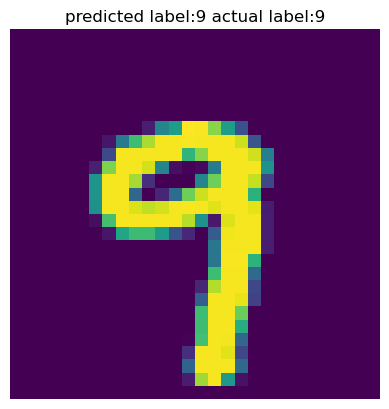

In [136]:
plt.imshow(random_image)
plt.title(f"predicted label:{predicted_label} actual label:{actual_label}")
plt.axis('off')
plt.show()